In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
pd.read_csv('D:/5.Python/Project SOS/Bike Rental Data Set/train.csv',dtype=str)

,id;year;hour;season;holiday;workingday;weather;temp;atemp;humidity;windspeed;count
0,3;2012;23;3;0;0;2;23.78;27.275;73;11.0014;133
1,4;2011;8;3;0;0;1;27.88;31.82;57;0;132
2,5;2012;2;1;0;1;1;20.5;24.24;59;0;19
3,7;2011;20;3;0;1;3;25.42;28.79;83;19.9995;58
4,8;2011;17;3;0;1;3;26.24;28.79;89;0;285
...,...
7684,10882;2012;18;1;0;1;1;13.94;15.15;42;22.0028;457
7685,10883;2012;3;1;0;1;1;9.02;11.365;51;11.0014;1
7686,10884;2012;15;2;0;0;1;21.32;25;19;27.9993;626
7687,10885;2011;19;4;0;1;1;12.3;14.395;45;15.0013;217


In [4]:
# The data read from csv is not in the right format, it need to be clarified more clearly how to read it 
df_raw = pd.read_csv('D:/5.Python/Project SOS/Bike Rental Data Set/train.csv', sep=";")

In [5]:
#check for dupes for Id (In this case, it do not have duplicate data)
idsUnique = len(set(df_raw.id))
idsTotal = df_raw.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [6]:
###Check null value
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


In [7]:
# Checking for null percentages (In this case it does not have null value as well =)))
display(round((df_raw.isnull().sum())*100/len(df_raw.index),2))

id            0.0
year          0.0
hour          0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
count         0.0
dtype: float64

In [8]:
df_raw.describe()

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,5463.266224,2011.495513,11.565353,2.506178,0.029002,0.677331,1.410066,20.267085,23.696581,61.771492,12.802070,191.419430
std,3144.709810,0.500012,6.915777,1.115935,0.167824,0.467528,0.628004,7.824066,8.514199,19.302151,8.178889,182.140265
min,3.000000,2011.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2771.000000,2011.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,5477.000000,2011.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,8186.000000,2012.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,10886.000000,2012.000000,23.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [9]:
#The data is now ready to go 
df= df_raw

3.Performing the test

In [10]:
#descriptive statistics summary
df['count'].describe()

count    7689.000000
mean      191.419430
std       182.140265
min         1.000000
25%        41.000000
50%       145.000000
75%       283.000000
max       977.000000
Name: count, dtype: float64

Because the minimum  is higher than zero (which is obviously true in reality), therefore, it is suitable for the project 

In [11]:
df

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285
...,...,...,...,...,...,...,...,...,...,...,...,...
7684,10882,2012,18,1,0,1,1,13.94,15.150,42,22.0028,457
7685,10883,2012,3,1,0,1,1,9.02,11.365,51,11.0014,1
7686,10884,2012,15,2,0,0,1,21.32,25.000,19,27.9993,626
7687,10885,2011,19,4,0,1,1,12.30,14.395,45,15.0013,217


In [12]:
#sns.distplot(df['count'], bins=5);
# Cái này đừng cho vào bài vì hàm phân phối lệch chuẩn r, kệ đi đấy nhá =)))

Cái này đừng cho vào bài vì hàm phân phối lệch chuẩn r =)))
From the chart above, it can be seen that:  
    + SalePrices deviates from the normal distribution  
    + It is appreciable positive skewness  
    + It Shows peakedness  

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['count'].skew())
print("Kurtosis: %f" % df['count'].kurt())

Skewness: 1.260538
Kurtosis: 1.358987


The values of Skewness and Kurtosis are in accceptable ranges  
These measures of symmetry are useful in order to understand the symmetry of the distribution of our main variable.   
Our distribution is highly skewed and present a longer tail on the right.  
The low value of kurtosis can determine an lower probability of outliers values. 

Before checking correlation some of them have dtype=int but they are still categorial variable, includes:


       year: year (2011 or 2012)
       season: 1 = winter, 2 = spring, 3 = summer, 4 = autumn
       hour: hour of the day (0 to 23)
       holiday: if the day was a holiday
       workingday: if the day was a working day (neither a holiday nor a weekend)
       weather: four categories (1 to 4) ranging from best to worst weather
Hence, it need to be excluded from regression

In [14]:
df_regression = df[['temp','atemp','humidity','windspeed','count']]

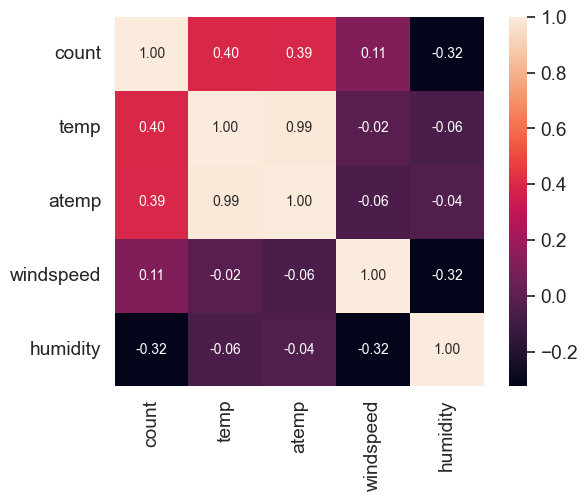

In [15]:
#count correlation matrix
k = 5 #number of variables for heatmap
corrmat = df_regression.corr()
cols = corrmat.nlargest(k, 'count')['count'].index
cm = np.corrcoef(df_regression[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the heatmap, I select factors which have correlation with SalePrices
According to the heatmap, I can detect several insights: 
- temp, atemp and windspeed are proportional to count while humidity inversely proportional
- Temp and Atemp are  strongly correlated variables with count, however, the relationship between them are considerably high(0.99> 0.8), hence I only keep one factor - temp because it has higher correlation with count

In [16]:
###Select highly correlated factors
df_regression_train= df_regression[['temp', 'windspeed','humidity']]

In [17]:
model= LinearRegression()
model.fit(df_regression_train, df_regression['count'])

LinearRegression()

In [18]:
model.coef_

array([ 8.83422887,  0.48671352, -2.77512821])

In [19]:
model.intercept_

177.56822787473004

##Thuật toán sẽ ntn 
count= 8.83422887*temp +0.48671352*windspeed -2.77512821*humidity + 177.56822787473004

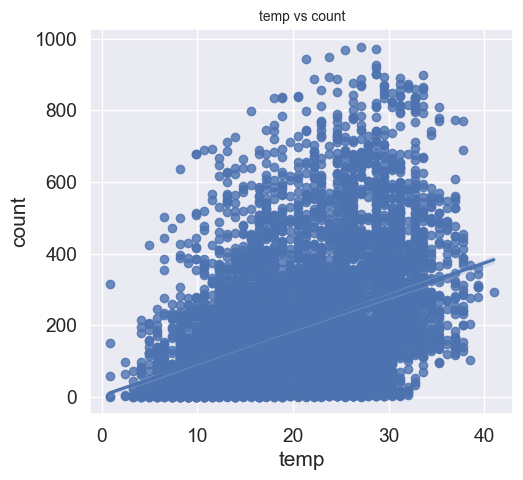

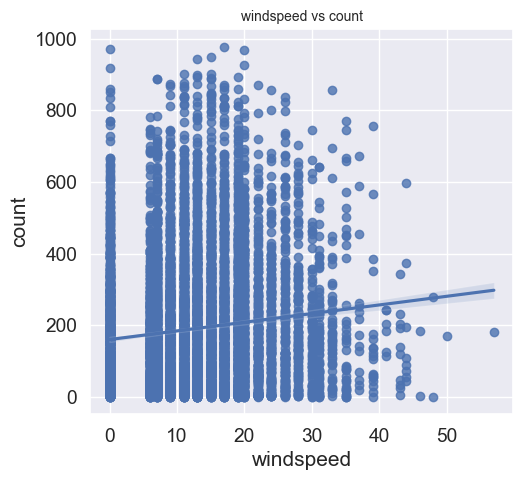

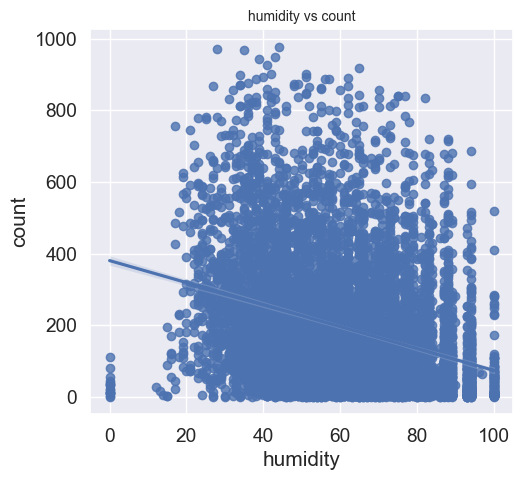

In [20]:
### Relationship with numerical values
numerical_values= df_regression_train.columns.values
for factor in numerical_values:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    ax = sns.regplot(x=factor, y="count", data=df)
    ax.set_title(f"{factor} vs count", fontsize=10)

In [21]:
### Relationship categorical variables

In [22]:
df

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285
...,...,...,...,...,...,...,...,...,...,...,...,...
7684,10882,2012,18,1,0,1,1,13.94,15.150,42,22.0028,457
7685,10883,2012,3,1,0,1,1,9.02,11.365,51,11.0014,1
7686,10884,2012,15,2,0,0,1,21.32,25.000,19,27.9993,626
7687,10885,2011,19,4,0,1,1,12.30,14.395,45,15.0013,217


In [23]:
df.drop(df_regression.columns.values, axis=1).columns

Index(['id', 'year', 'hour', 'season', 'holiday', 'workingday', 'weather'], dtype='object')

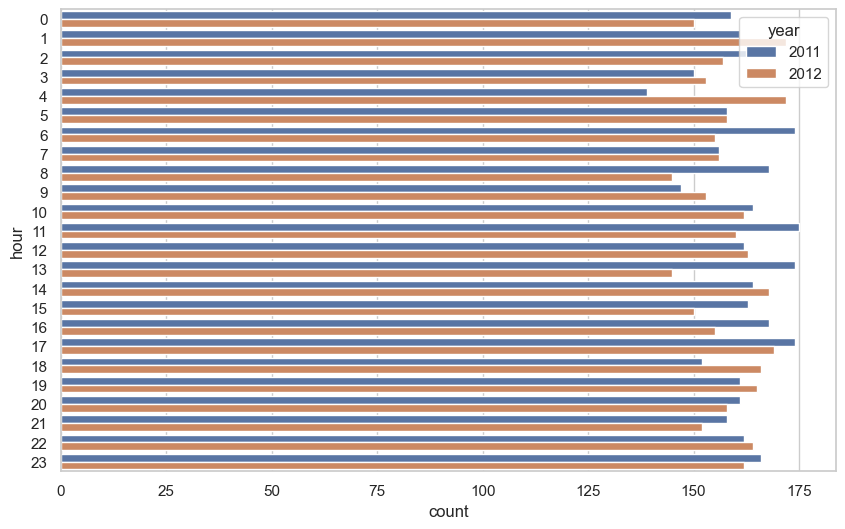

In [24]:
#Data này ảo vãi nồi, 0h mà vẫn có ng đi thuê xe đạp =)))
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(y="hour", hue="year", data=df)
plt.show()

Text(0.5, 1.0, 'number of rentals per season')

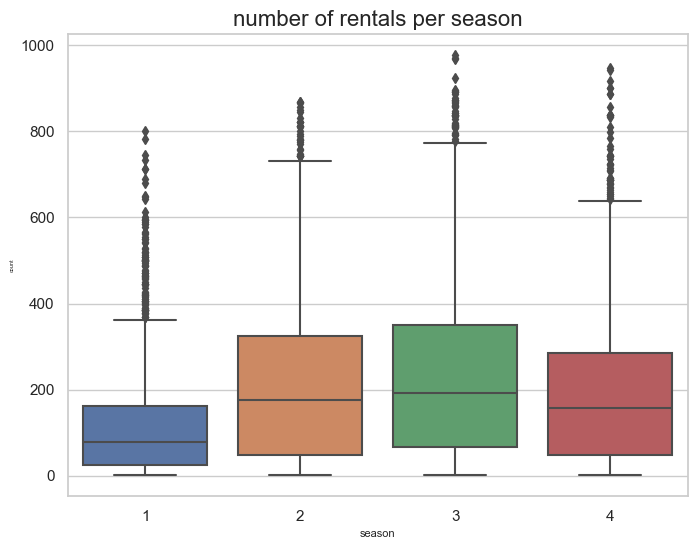

In [25]:
### Mùa Thu và mùa xuân nhiều người thuê 
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='count', data=df)
plt.xlabel('season', fontsize=8)
plt.ylabel('count', fontsize=4)
plt.title('number of rentals per season', fontsize=16)

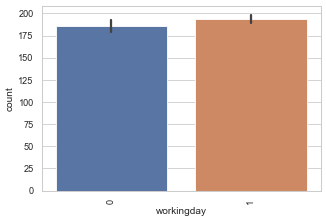

In [26]:
plt.figure(figsize = (6,4), dpi = 60)
sns.barplot(x = 'workingday', y ='count', data=df )
plt.xticks(rotation = 90)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_6848\2501590007.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\admin\AppData\Local\Temp\ipykernel_6848\2501590007.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='weather', y='count', data=df, jitter=True, palette="Set2", linewidth=1)


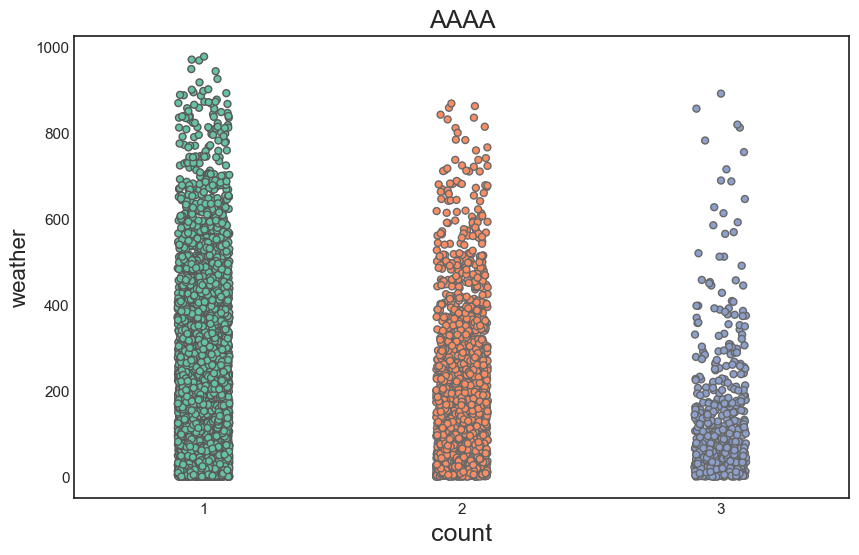

In [27]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-white')
sns.stripplot(x='weather', y='count', data=df, jitter=True, palette="Set2", linewidth=1)
plt.title('AAAA', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.ylabel('weather', rotation=90, fontsize=16)
plt.show()

Lưu ý khi nhận xét: 
